# ISMT E-111 Coding Challenge 2023
### Due: 2023-05-02 8pm ET
#### Make sure to include any relevant code when providing all answers.
Enter your code into *this* notebook **AND** enter your name in the following cell

#### Always show your work, and if there is a question being asked be sure to answer it.
You can answer with a comment, print statement or markdown cell <br>(remember a comment is preceded by a hash symbol `#here is my comment`)


### Challenge is out of 150 points 
  * **100 points for the main challenge**
  * **50 bonus points for extra credit**
 
#### Notes
* Dont worry about missing values, they're addressed in the Extra Credit portion

#### Submission
* Send this completed .ipynb (with all cells run and outputs visible) to ujas_shah@g.harvard.edu with your first and last name in the filename (e.g., `ujas_shah_codingchallenge_s2023.ipynb`) **AND** also submit a pull request with the updated notebook on to the repository.
* If you cant find the location of this notebook you can run the following to find your notebook:<br> 
`import os`<br>
`print(os.getcwd())`<br>
Drag and drop that .ipynb file into your email

In [1]:
#name: Khaled Arnaout

### 1. Load your Data and Take a Look

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`10 pts`)** Load the training data (found in the same github repo as this notebook) into this notebook using Pandas. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`5 pts`)** Show the first 10 lines of the data.

In [2]:
import pandas as pd

df = pd.read_csv("./codingdata.csv")
df.head(10)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
5,EMA00081000131660,1,1.5,1,G,2,NaN,2,416,11.0,0.0,0
6,EMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0
7,EMA00081000269630,1,0.7,2,G,2,21.0,2,1241,6.0,2.0,0
8,EMA00081000287790,1,2.0,1,G,2,NaN,3,655,11.0,4.0,0
9,EMA00081000367310,2,0.5,1,G,2,40.0,3,655,11.0,0.0,0


### 2.  Define and describe your target variable
The `email status` column contains three values with the following definitions.  
`0=ignored` `1=read` and `2=converted`
* Ignored means that the customer did not interact with the email
* Read means that a customer opened the email
* Converted means that the customer clicked on the link for the product page within the email. 

The company considers an `email_status` of `2` as a conversion, (statuses 0 and 1 are non-conversions).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`10 pts`)** Create a new column called `conversion` that has a value of `1` when the email was follwed by a conversion and is `0` otherwise.

In [3]:
df["Conversion"] = df["Email_Status"].apply(lambda x:1 if x==2 else 0)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.**  **(`10 pts`)** How many conversions are in this dataset?<br>

In [4]:
count_conversions = df['Conversion'].sum()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.**  **(`10 pts`)** What percent of all emails resulted in a conversion?<br><i>Show output you used to determine this answer and provide your answer as a comment</i>

In [5]:
count_total = df['Conversion'].count()
percentage_conversion = (count_conversions/count_total)*100
print(percentage_conversion)

# 3.47 Percentage of emails are resulting in a conversion.

3.4716837593082963


### 3 Exploration

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** The `Email_Campaign_Type` column captures the campaign under which the email was sent. A campaign is a marketing strategy.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.**  **(`15 pts`)** Which campaign had the most conversions?

In [6]:
campaign_conversions = df.groupby('Email_Campaign_Type')['Conversion'].sum()
campaign_conversions_sorted = campaign_conversions.sort_values(ascending=False)
most_converted_campaign = campaign_conversions_sorted.index[0]
print(most_converted_campaign)

3


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.**  **(`15 pts`)** Which campaign has the highest conversion rate?

In [7]:
campaign_conversion_rate = df.groupby('Email_Campaign_Type')['Conversion'].sum() / df.groupby('Email_Campaign_Type')['Email_ID'].count()
campaign_conversion_rate_sorted = campaign_conversion_rate.sort_values(ascending=False)
highest_conversion_rate_campaign = campaign_conversion_rate_sorted.index[0]
print(highest_conversion_rate_campaign)

1


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b**.
`Total_Past_Communications` is a count of the number of times the customer has been contacted prior to the current email. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** **(`12 pts`)** Create a box plot showing the distribution of `Total_Past_Communications` by `conversion`. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii** **(`7 pts`)** How do conversions relate to the number of times a customer had been emailed?  Set the title to something that briefly summarizes this relationship. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** **(`3 pts`)** Set the x-label to be `Conversion Status` and the y-label to be `Previous Emails`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv** **(`3 pts`)** Prevent the default text `'Boxplot grouped by conversion'` from displaying in the title of the boxplot, and do not show extreme values / outliers.  Then show your plot!

_note: the output should be one boxplot, rather than one boxplot per sub-question_

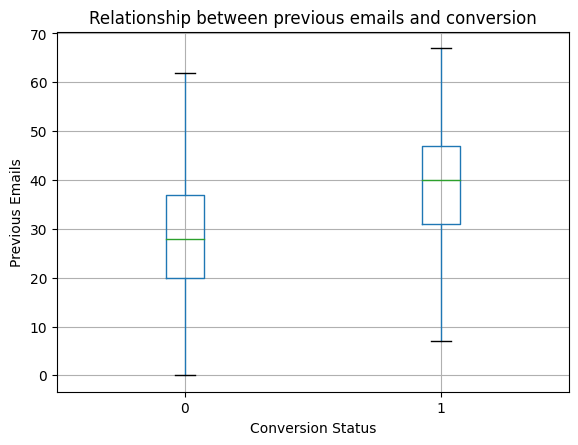

In [8]:
import matplotlib.pyplot as plt

# 3b (i)
df.boxplot(column='Total_Past_Communications', by='Conversion', showfliers=False)

# 3b (ii) 
# There seems to be a slight positive correlation between the number of times a customer has been emailed and the conversion rate. Customers who were contacted more times tended to have a slightly higher conversion rate than those who were contacted less frequently.
plt.title("Relationship between previous emails and conversion")

# 3b (iii)
plt.xlabel("Conversion Status")
plt.ylabel("Previous Emails")

# 3b (iv)
plt.suptitle("")

# Display the plot
plt.show()



***
You're done!  You can relax and submit this assignment! <br>If you're feeling ambitious, you can try your hand at the _extra credit_ portion below.  

***
# Extra Credit: Build, Interpret and Assess a Machine Learning Model to Predict Conversion Rate

**1.  Data Cleaning & Prep** 
We'll be encoding a categorical variable, joining it to all of our numerical variables and generating a train-test split to train and test our model.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Which columns are categorical columns and which are numerical? Create a list of categorical column names and a list of numerical column names. Ignore the following columns: `Email_ID`, `Email_Status`, `conversion`.  You should have ten columns to categorize.  Save each list to a variable (e.g., `my_var = ['a', 'b', 'c']`)

In [9]:
categorical_cols = ['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category']
numerical_cols = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`2.5 pts`)** A few of the columns have missing values, let's just drop them.  Hint: a pandas method can do this for you.

In [10]:
df.dropna(inplace=True)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`10 pts`)** Add dummy variables for the `Email_Campaign_Type` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Hint**: a pandas method can help you do this as well. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Also, should you create dummy columns for all the different values of the categorical variable for a logistic regression? Why or why not?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Create a variable called `all_features` that is a list of all the variables we want to use in our model.  This will be all numerical variables and the dummy variables.  Print the variable (i.e., `print(all_features)`).  <br>


In [11]:
campaign_dummies = pd.get_dummies(df['Email_Campaign_Type'], prefix='Campaign', drop_first=True)
data = pd.concat([df, campaign_dummies], axis=1)

# We do not need to create dummy variables for all the different values of the categorical variables, as this can lead to multicollinearity in the model. Multicollinearity occurs when two or more variables in the model are highly correlated with each other. This can make it difficult to interpret the coefficients of the model, and can lead to overfitting. It is generally recommended to exclude one category as the reference category, and create dummy variables for the remaining categories.

all_features = numerical_cols + list(campaign_dummies.columns)
print(all_features)

['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images', 'Campaign_2', 'Campaign_3']


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.** **(`7.5 pts`)** Split the dataframe into 80% training data and 20% testing data using the Sci-kit learn `train_test_split` function. When you pass the data to be split, be sure to add an intercept!  
To do this simply pass `sm.add_constant(df[all_features])` (where `sm` is the alias for `statsmodels.api`) instead of just `df[all_features]` (in other words, `df[all_features]` is your modeling dataframe subset to the features you will use to model).  
Finally, add the following argument to train_test_split:  `random_state=42`

*print the number of rows and columns in all the dataframes you created in this step*

In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant(data[all_features])
y = data['Conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (38632, 8)
Shape of y_train:  (38632,)
Shape of X_test:  (9659, 8)
Shape of y_test:  (9659,)


**2.  Build, interpret and score a logistic regression model!** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Build a Logistic Regression using statsmodels (statsmodels.api).  What data split from question 1d should you include for the training? Why?<br>

In [13]:
model = sm.Logit(y_train, X_train).fit()

# For building a Logistic Regression using statsmodels, we should use the training data split from question 1d. This is because we need to train the model using the training data and then evaluate the performance of the model on the testing data. This will give us an idea of how well the model will generalize to new data.


Optimization terminated successfully.
         Current function value: 0.130311
         Iterations 8


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.**  Using the Model Summary answer the following questions <br>
You can provide your answer as a comment (`# Anything following a hash mark is a comment`) or in any other manner you like.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** **(`2 pts`)** which variables have a statistically significant positive correlation with the target
<br>

In [15]:
print(model.summary())
# The variables Total_Past_Communications, Total_Links, Campaign_2 and Campaign_3 have statistically significant positive correlation with the target.

                           Logit Regression Results                           
Dep. Variable:             Conversion   No. Observations:                38632
Model:                          Logit   Df Residuals:                    38624
Method:                           MLE   Df Model:                            7
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.1396
Time:                        20:56:58   Log-Likelihood:                -5034.2
converged:                       True   LL-Null:                       -5850.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.1668      0.147     -7.951      0.000      -1.454      -0.879
Subject_Hotness_Score         0.1180      0.064      1.843      0.065      -0.008     

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.** **(`2 pts`)**
which variables have a statistically significant negative correlation with the target?

In [ ]:
# None of the variables have statistically significant negative correlation with the target.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** **(`2 pts`)**
What does it mean for a variable to be statistically significant?

In [ ]:
#  A variable is statistically significant if it has a p-value less than the chosen significance level (usually 0.05). This means that there is sufficient evidence to reject the null hypothesis that the variable has no effect on the target.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv.** **(`4 pts`)**
What suggestions can you make based on these results? 

In [ ]:
# Based on these results, we can suggest that variables like Total_Past_Communications, Total_Links, Campaign_2 and Campaign_3 are important predictors of the target and should be given more weight in the model. We can also suggest removing variables like Word_Count and Total_Images, which do not have a statistically significant effect on the target.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`5 pts`)** Use your model to get predictions for the test data. <br>
Get predictions by applying the model you just fit to the _test_ data.  Save the predictions to a variable.<br>

In [18]:
y_pred = model.predict(X_test)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.**  **(`5 pts`)** The ROC AUC score informs you as to how good your model is at telling which emails are more likely to result in conversions than others. Use the function within Scikit-Learn to plot this.<br>
Describe how you would expect the curve to change for a more performant model.

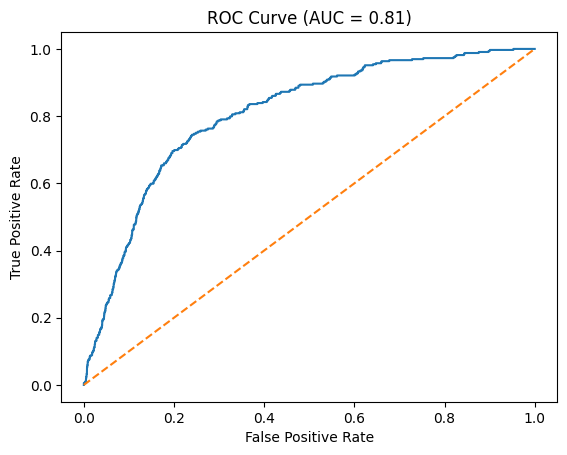

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.show()
